_Este es el notebook de la práctica de Guillermo Barrio. Se trata del único documento de la práctica, por lo que el código se acompaña de comentarios, bien en cursiva dentro de una celda de markdown, o dentro del código como comentarios en python_

# Práctica Final

Enhorabuena!!! Ya el haber llegado hasta aquí es un logro más en tu camino para ser un experto del Big Data y del Machine Learning!! 


<img src="./Images/happy.gif" alt="Drawing" style="width: 300px;"/>

Con esta práctica pondremos en valor todo lo que hemos visto a lo largo del módulo. Vamos allá!! 😄

## 1. ¿Cuánto cuesta hacer una cerveza?

Este ejercicio pondrá a prueba tu habilidad resolver un problema usando vectores.

**Objetivos**:
- Usar `Python`
- Asegurar los fundamentos matemáticos detrás de las operaciones con vectores.

**Problema**: Determinar el precio de la cerveza en base a sus ingredientes.

**Datos:**

Considerando que los ingredientes de la cerveza son:<br>
`ingredientes = {lúpulo, malta, agua, levadura}`

Por otro lado tenemos el vector coste:<br>
`coste = {lúpulo: 2.5, malta: 1.5, agua: 0.006, levadura: 0,45}`

Por último tenemos el vector cantidad con lo necesario para hacer una cerveza:<br>
`cantidad = {lúpulo: 6u, malta: 14u, agua: 7u, levadura: 11u}`

_Este primer ejercicio tiene la dificultad de que hay que iterar dentro de un diccionario, cuyas keys vienen en otra lista, pero se consigue utilizando funciones f_

In [8]:
### TODO: Crear una función para determinar el precio de la cerveza en base a sus ingregientes
### Contruye una función que toma como input 3 diccionarios: coste, cantidad e ingredientes
### Devuelve el precio de la cerveza
### TU RESPUESTA ABAJO

def precio_cerveza(coste, cantidad, ingredientes):
    """Calcula el precio de la cerveza
    
    Argumentos:
        coste -- Diccionario con el coste de cada ingrediente
        cantidad -- Diccionario con la cantidad de cada ingrediente
        ingredientes -- Set de ingredientes que componen a la cerveza
        
    Ejemplo:
        ingredientes = {'lupulo', 'malta', 'agua', 'levadura'}
        coste = {'lupulo': 2.5, 'malta': 1.5, 'agua': 0.006, 'levadura': 0.45}
        cantidad = {'lupulo': 6, 'agua': 7, 'malta': 14, 'levadura': 11}
        precio_cerveza(coste, cantidad, ingredientes) #-> 40.9920
    """
    # TODO
    
    # Creamos unos arrays de numpy de costes unitarios y cantidades que vamos rellenando mientras iteramos el diccionario de ingredientes.
    
    coste_unitario = np.array([])
    cantidades = np.array([])
    
    for item in ingredientes:
        coste_unitario = np.append(coste_unitario, coste[f'{item}'])
        cantidades = np.append(cantidades, float(cantidad[f'{item}'][:-1]))
        
    # Devolvemos el producto escalar de ambos arrays, que es la solución buscada.
    
    
    return coste_unitario @ cantidades

In [9]:
import numpy as np

ingredientes = {'lupulo', 'malta', 'agua', 'levadura'}
coste = {'lupulo': 2.5, 'malta': 1.5, 'agua': 0.006, 'levadura': 0.45}
cantidad = {'lupulo': '6u', 'malta': '14u', 'agua': '7u', 'levadura': '11u'}

In [13]:
# Calculamos en coste de la cerveza llamando a la función que lo calcula con los datos definidos en la celda anterior.

# El resultado es el correcto, que redondeamos a dos decimales para asemejarse a un precio en euros y céntimos.

coste_cerveza = np.round(precio_cerveza(coste, cantidad, ingredientes), 2)
coste_cerveza

40.99

## 2. Singular Value Decomposition

Este ejercicio pondrá a prueba tu habilidad para usar Singular Value Decomposition para comprimir una imagen.

**Objetivos**
- Usar `Python`
- Entender los fundamentos de `SVD`.

**Problema:** Usar `SVD` para comprimir una imagen en blanco y negro.

La imagen que deberas usar es la siguiente:

_El ejercicio 2 es relativamente sencillo, siguiendo los ejemplos de los NBooks, y los presentes en las celdas, con los que hemos comprebado que íbamos bien. Se han dejado estos cálculos._

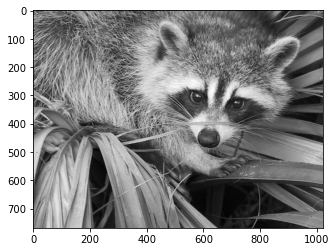

In [14]:
import matplotlib.pyplot as plt
from scipy import misc
%matplotlib inline

# Load image
A = misc.face(gray=True)

plt.imshow(A, cmap=plt.cm.gray)

Deberas crear tu propia función para calcular el error de reconstrucción, que viene definido por:

$$SSE =  \sum_{n}^{i=1}  \begin{Vmatrix}x_{i} -  \widehat{x}_i \end{Vmatrix} ^2 $$

Donde:

- $x_i$ son los valores de la matriz original X
- $\widehat{x}_i$ son los valores de la matriz reconstruida

In [15]:
### TODO: Función para calcular el error de reconstrucción
### TU RESPUESTA ABAJO

import numpy as np

def sse_score(X, X_hat):
    """
    Función para calcular el error de reconstrucción
    
    Argumentos:
        X -- Matriz Original
        X_hat -- Matriz Reconstruida
        
    Ejemplo:
        X = np.array([[1, 2], [3, 4]])
        X_hat = np.array([[1.01, 1.75], [2.81, 3.99]])
        sse = sse_score(X, X_hat) # -> 0.09879
    """
    # TODO
    
    # El cálculo del sse se puede hacer en una línea utilizando comandos de numpy.
    
    sse = np.sum((X - X_hat)**2)
    
    
    return sse

Una vez que ya tenemos la función `sse` hecha, podemos pasar a construir la función que ejecutará `SVM`.

In [17]:
# Chequemos las dimensiones de la imagen, para ver de que tamaño estamos hablando.

A.shape

(768, 1024)

In [18]:
X = np.array([[1, 2], [3, 4]])
X_hat = np.array([[1.01, 1.75], [2.81, 3.99]])

In [21]:
# Llamamos a la función sse score, para comprobar que funciona.

sse = sse_score(X, X_hat)

In [23]:
# El resultado es el correcto.

print(sse)

0.09879999999999997


_Rellenamos la función que ejecuta el SVM_

In [24]:
### TODO: Función para ejecutar SVM
### Tiene como entrada una matriz X
### Devuelve U, s, Vt

### Hint: S debe ser una matriz diagonal
### TU RESPUESTA ABAJO

def svm(X):
    """
    Función que ejecuta SVM y devuelve U, S, Vt
    
    Argumentos:
        X -- Matriz Original
        
    Ejemplo:
        X = np.array([[1, 2], [3, 4]])
        U, S, Vt = svm(X)  
        
        # -> U = array([[-0.40455358, -0.9145143 ],
        #               [-0.9145143 ,  0.40455358]])
        # -> S = array([[5.4649857 , 0.        ],
        #               [0.        , 0.36596619]])   
        # -> Vt = array([[-0.57604844, -0.81741556],
        #                [ 0.81741556, -0.57604844]])          
    """
    # TODO
    
    # Aplicamos el método de numpy para la descomposición SVM
    
    U, s, Vt = np.linalg.svd(X, full_matrices=False)
    
    # Pasamos el array s a una matriz diagonal S, y devolvemos la descomposión
    
    S = np.diag(s)
    
    
    return U, S, Vt

In [25]:
X = np.array([[1, 2], [3, 4]])

In [26]:
U, S, Vt = svm(X)

_Comprobamos que las matrices calculadas con la función, U, S y V traspuesta, son las correctas_

In [31]:
U

array([[-0.40455358, -0.9145143 ],
       [-0.9145143 ,  0.40455358]])

In [32]:
S

array([[5.4649857 , 0.        ],
       [0.        , 0.36596619]])

In [33]:
Vt

array([[-0.57604844, -0.81741556],
       [ 0.81741556, -0.57604844]])

Como hemos visto en clase, las matrices obtenidas a partir de `SVM` nos sirven para reconstruir la matriz original `X`. Para ello, construye una función que permita reconstruir la matriz original `X` a partir de `U, s, Vt`.

_Ahora completamos la función de reconstrucción, que se trata de, en la práctica, un producto de las matrices obtenidas en las celdas anteriores_

In [34]:
### TODO: Función para reconstruir la matriz original a partir de U, s, Vt
### Tiene como entrada U, s, Vt
### Devuelve X_hat
### TU RESPUESTA ABAJO


def reconstruction(U, S, Vt):
    """
    Función que reconstruye la matriz original a partir de U, s, Vt
    
    Argumentos:
        U -- Matriz de Singular Vectors
        s -- Matriz de Eigenvalues
        Vt -- Matriz de Singular Vectors
        
    Ejemplo:
        U = np.array([[-0.40455358, -0.9145143 ],
                      [-0.9145143 ,  0.40455358]])
        S = np.array([[5.4649857 , 0.        ],
                      [0.        , 0.36596619]])
        Vt = np.array([[-0.57604844, -0.81741556],
                       [ 0.81741556, -0.57604844]])
        X_hat = reconstruction(U, S, Vt)
        
        # X_hat -> array([[0.99999999, 1.99999998],
        #                 [3.00000003, 4.00000001]])
    """
    # TODO
    
    # Este es el producto de las matrices, que retornamos a continuación.
    
    X_hat = U.dot(S.dot(Vt))
    
    
    return X_hat

In [35]:
# Tomamos las matrices del ejemplo de la celda anterior

U = np.array([[-0.40455358, -0.9145143 ],
            [-0.9145143 ,  0.40455358]])

S = np.array([[5.4649857 , 0.        ],
            [0.        , 0.36596619]])

Vt = np.array([[-0.57604844, -0.81741556],
            [ 0.81741556, -0.57604844]])

In [36]:
# Llamamos a la función de reconstrucción

X_hat = reconstruction(U, S, Vt)

In [38]:
# El resultado es el correcto

X_hat

array([[0.99999999, 1.99999998],
       [3.00000003, 4.00000001]])

Calcula el error de reconstrucción usando la función `sse` que has programado anteriormente.

In [39]:
# Aplicamos la función definida anteriormente para calcular el errorm que resulta insignificante.

sse = sse_score(X, X_hat)
print(f"El error de reconstrucción es: {sse}")

El error de reconstrucción es: 1.4715304986234458e-15


Una vez que hemos programado todas las funciones necesarias para realizar `SVM` y medir el error de reconstrucción, podemos proceder a realizar la compresión de la imagen. Esta [página web](http://timbaumann.info/svd-image-compression-demo/) te ayudará a repasar y a entender como calcular la compresión.

Debes usar la siguiente imagen: 

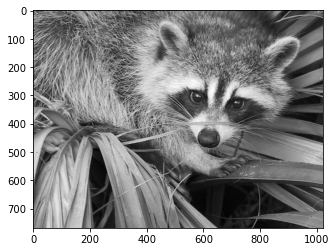

In [45]:
# Load image
A = misc.face(gray=True)

plt.imshow(A, cmap=plt.cm.gray)

_Completamos la función de compresión de la imagen, que tiene la complicación de tener que modificar las matrices obtenidas mediante la aplicación de la función svm(), ya definida. Utilizamos también la función que nos calcula el error, sse_score._

In [43]:
### TODO: Función que recibe una imagen A y devuelve la imagen comprimida
### Tiene como entrada A y el número de componentes para realizar la reducción de dimensionalidad
### Devuelve la imagen comprimidad, el error de reconstrucción y el ratio de compresión

### Hint: Usa las funciones anteriormente construidas
### TU RESPUESTA ABAJO


def image_compression(A, n_components):
    """
    Función para comprimir una imagen A
    
    Argumentos:
        A -- Imagen original
        n_components -- Número de componentes
        
    Ejemplo:
        A_hat, sse, comp_ratio = image_compression(A, n_components=50)
    """
    
    # TODO
    
    # Aplicación de la función svm()
    
    U, S, Vt = svm(A)
    
    # Recorte de las matrices al número de componentes
    
    A_hat = U[:, 0:n_components]\
        .dot(S[:n_components, :n_components])\
        .dot(Vt[:n_components, :])
    
    # Cálculo del error y el comp ratio
    
    sse = sse_score(A, A_hat)
    
    comp_ratio = (A.shape[1]*n_components + n_components + A.shape[0]*n_components)/(A.shape[1] * A.shape[0])
    
    return A_hat, sse, comp_ratio

In [44]:
A_hat, sse, comp_ratio = image_compression(A, n_components=10)

Grafica la imagen original `X` y la imagen reconstruida `X_hat`, y imprime el error de reconstrucción `sse` y el `ratio de compresion`.

_Tomamos un número de componentes bajo, 10, para poder apreciar la diferencia respecto al original. El ratio de compresión es de apenas un 2%, aunque aún así si se puede distinguir claramente lo que muestra la foto._

Reconstruction Error: 567532952.9328855
Ratio de compresión: 0.022799173990885418


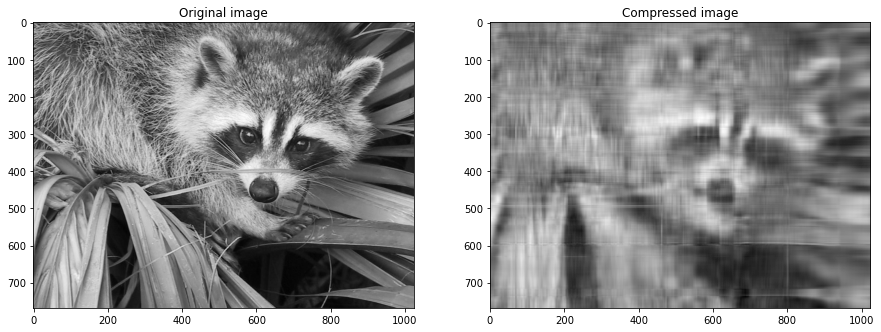

In [46]:
print(f"Reconstruction Error: {sse}")
print(f"Ratio de compresión: {comp_ratio}")

plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(A, cmap=plt.cm.gray)
plt.title('Original image')
plt.subplot(122)
plt.imshow(A_hat, cmap=plt.cm.gray)
plt.title('Compressed image')
plt.show()

## 3. Linear Regression - Least Squares

Este ejercicio pondrá a prueba tu habilidad para programar tu propia versión de mínimos cuadrados en Python.

**Objetivos**:
- Usar `Python` + `Pandas` para leer y analizar los datos.
- Asegurar los fundamentos matemáticos detrás del método de los mínimos cuadrados.

**Problema**: Usando datos sobre el precio de la vivienda, intentaremos predecir el precio de una casa en base a la superficie habitable con un modelo de regresión.

**Datos:** [Kaggle's House Prices Dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

### Repaso

Usaremos la versión matricial de la solución de los **métodos de los mínimos cuadrados** para resolver este problema. Como recordatorio, expresamos los coeficientes $w_{LS}$ como un vector, y calculamos ese vector en base a la matriz de entrada $X$ y en base a $y$.<br><br>



Como mostramos en clase, la matriz $X$ siempre contiene un vector de valores $1$ en la primera columna. En otras palabras:<br><br>

<center>$
X = \begin{bmatrix}
1 \  x_{11}  \\
1 \  x_{21}  \\
\vdots \ \vdots \\
1 \ x_{n1}
\end{bmatrix} 
$</center>

Para dos variables, $X$ tomará esta forma:
 
<center>$
X = \begin{bmatrix}
1 \  x_{11} \  x_{12} \\
1 \  x_{21} \  x_{22} \\
\vdots \ \vdots \\
1 \ x_{n1} \  x_{n2}
\end{bmatrix} 
$</center>

### Exploratorio de datos

_En este ejercicio encontramos una serie de dificultades al tener que utilizar algunos métodos de pandas, pero parece que lo hemos conseguido._

In [53]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [54]:
### Leer los datos
tr_path = './data/train.csv'
data = pd.read_csv(tr_path)

In [55]:
### La función .head() muestras las primeras lineas de los datos
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [56]:
### Lista con los nombres de las columnas
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [47]:
# Utilizamos el método shape, también presente en pandas, para ver las dimensiones del dataframe

data.shape

(1460, 81)

In [48]:
### TODO: Numero de columnas 
### Asignar el numero de columnas (int variable) a ans1
### TU RESPUESTA ABAJO

# Al devolver el método, más bien atributo, shape un tuple, leemos el segundo elemento, correspondiente a las columnas.

ans1 = data.shape[1]

ans1

81

#### Visualizaciones

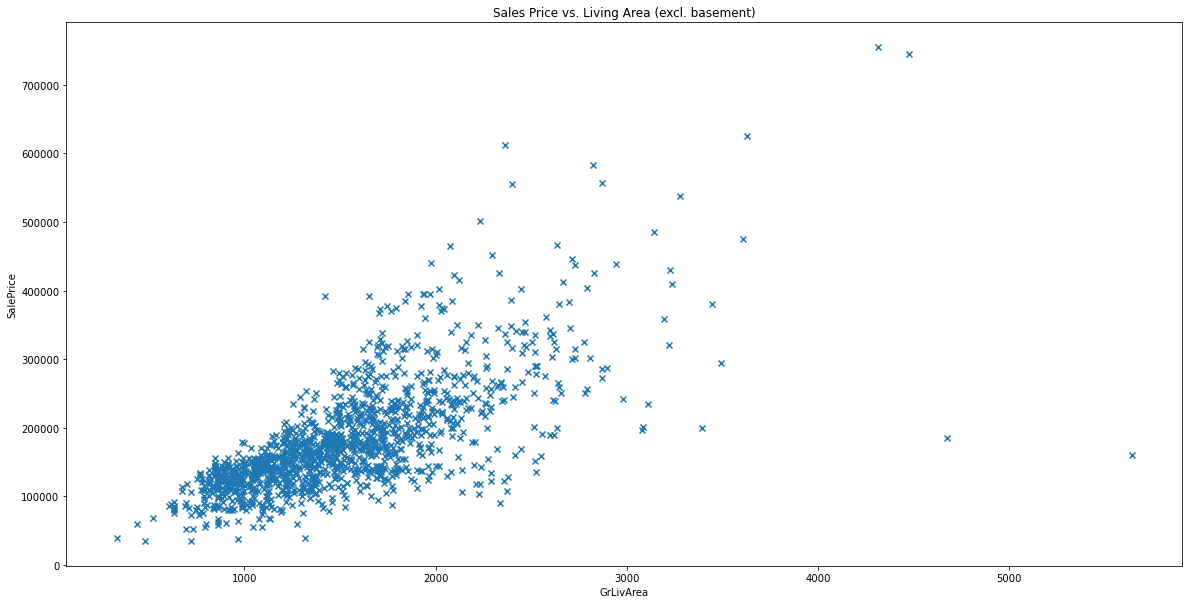

In [59]:
### Podemos graficar los datos price vs living area - Matplotlib

Y = data['SalePrice']
X = data['GrLivArea']

plt.scatter(X, Y, marker = "x")

### Anotaciones
plt.title("Sales Price vs. Living Area (excl. basement)")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice");

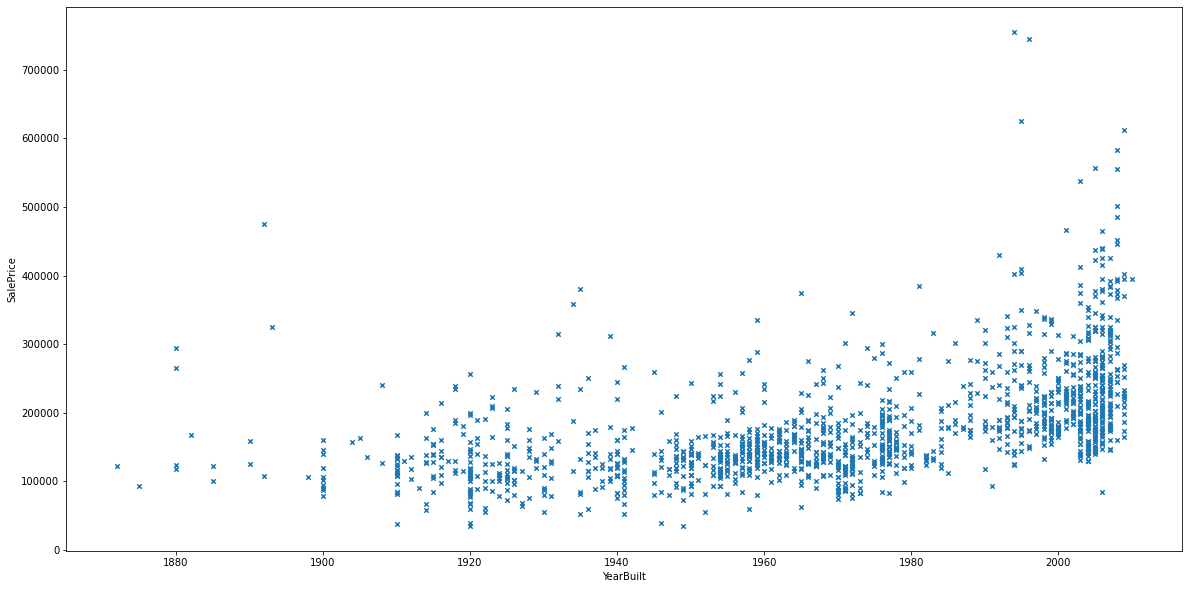

In [60]:
### price vs year - Pandas

data.plot('YearBuilt', 'SalePrice', kind = 'scatter', marker = 'x');

### Regresión Lineal

Ya que conocemos la ecuación para $w_{LS}$ tenemos todo lo necesario para resolver la regresión lineal. Vamos allá!<br><br>

<center>$w_{LS} = (X^T X)^{-1}X^T y,$</center>


_Comenzamos con la función de cálculo de la matriz inversa._

In [50]:
### TODO: Función para invertir una matriz
### Contruye una función que toma como input una matriz
### Devuelve la inversa de dicha matriz
### TU RESPUESTA ABAJO

def inverse_of_matrix(mat):
    """Calcula y devuelve la inversa de la matriz
    
    Argumentos:
        mat -- Matriz cuadrada a invertir
        
    Ejemplo:
        sample_matrix = [[1, 2], [3, 4]]
        the_inverse = inverse_of_matrix(sample_matrix)  
        # -> the_inverse = [[-2.   1. ]
        #                   [ 1.5 -0.5]]
    
    Requerimientos:
        Esta función depende de 'numpy.linalg.inv'
    """
    
    # TODO
    
    # Para el cálculo de la matriz inversa utilizamos el método correspondiente en numpy.
    
    mat_inv = np.linalg.inv(mat)
    
    return mat_inv

In [53]:
# Comprobamos que, efectivamente, obtenemos el resultado correcto.

sample_matrix = [[1, 2], [3, 4]]
the_inverse = inverse_of_matrix(sample_matrix)  

In [54]:
the_inverse

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

#### Leer los datos

Lo primero que debemos hacer es leer los datos, para ello construye una función que reciba el directorio de un archivo .csv `file_path` y lo lea usando `pandas`, la función debe devolver el dataframe.

_Leemos los datos con el método estandard de pandas; contiene muchas opciones, pero no parecen necesarias al ser una tabla de datos bastante limpia._

In [56]:
### TODO: Función para leer un .csv
### La función recibe un file_path y debe devolver el dataframe
### TU RESPUESTA ABAJO

import pandas as pd

def read_to_df(file_path):
    """Leer un archivo .csv"""
    
    # TODO
    
    # Método de pandas, y retorno del dataframe obtenido.
    
    df = pd.read_csv(file_path)
    
    return df

In [59]:
# Ejecutamos la lectura del dataframe, y comprobamos su estructura con el método head()

df = read_to_df('./data/train.csv')

In [60]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Subset del dataframe por columnas

Queremos construir una función que nos permita obtener los datos de ciertas columnas. Por ello, le pasaremos como argumento un `dataframe` y una lista con los nombres de las columnas que queremos extraer `column_names` y nos devolverá un dataframe con solo esas columnas.

_En las celdas que siguen utilizaremos en varias ocasiones el método .loc de pandas, que resulta muy útil._

In [63]:
### TODO: Función para extraer los datos de ciertas columnas
### Como argumentos, recibe un dataframe `data_frame`y una lista con los nombres de las columnas `column_names`
### Devuelve un dataframe con solo las columnas que le hemos especificado
### TU RESPUESTA ABAJO

def select_columns(data_frame, column_names):
    """Devuelve un subset del dataframe en base a los nombres de las columnas
    
    Argumentos:
        data_frame -- Dataframe Object
        column_names -- Lista con los nombres de las columnas a seleccionar
        
    Ejemplo:
        data = read_into_data_frame('train.csv')
        selected_columns = ['SalePrice', 'GrLivArea', 'YearBuilt']
        sub_df = select_columns(data, selected_columns)
    """
    
    # TODO
    
    # Hacemos un .loc seleccionado todas las filas, y las columnas presentes en la lista column_names.
    
    sub_df = data_frame.loc[:, column_names]
    
    
    return sub_df

In [64]:
# Cargamos el dataframe completo en data

data = read_to_df('./data/train.csv')

selected_columns = ['SalePrice', 'GrLivArea', 'YearBuilt']

In [67]:
# Ejecutamos la función para solo seleccionar una serie de columnas, definidas en la celda anterior.

sub_df = select_columns(data, selected_columns)

In [68]:
sub_df.head()

,SalePrice,GrLivArea,YearBuilt
0,208500,1710,2003
1,181500,1262,1976
2,223500,1786,2001
3,140000,1717,1915
4,250000,2198,2000


#### Subset del dataframe por valores

El siguiente paso es construir una función que recibe un `data_frame`, el nombre de una columna, un valor mínimo y un valor máximo `cutoffs`. Nos devuelve un dataframe excluyendo las filas donde el valor de la columna indica está fuera de los valores mínimos y máximos que le hemos indicado.

_Ahora tenemos la complicación de los cutoffs. La función que hemos rellenado itera en la lista de tuples y aplica sucesivamente el método .loc. Para cada iteración un primer .loc descarta los valores demasiado pequeños, y el segundo los más grandes._

In [70]:
### TODO: Función para crear un nuevo subset en base a valores
### Como argumento recibe un dataframe y una lista de tuples
### Tuples: (column_name, min_value, max_value)
### Devuelve un dataframe que excluye las filas donde los valores, en la columna que le hemos indicado, exceden los valores
### que le hemos indicado
### No eliminar la fila si los valores son iguales al min/max valor
### TU RESPUESTA ABAJO

def column_cutoff(data_frame, cutoffs):
    """Crea un nuevo dataframe en base a unos límites
    
    Argumentos:
        data_frame -- Dataframe Object
        cutoffs -- Lista de tuples con el siguiente formato:
        (column_name, min_value, max_value)
        
    Ejemplo:
        data_frame = read_into_data_frame('train.csv')
        # Remove data points with SalePrice < $50,000
        # Remove data points with GrLiveAre > 4,000 square feet
        cutoffs = [('SalePrice', 50000, 1e10), ('GrLivArea', 0, 4000)]
        selected_data = column_cutoff(data_frame, cutoffs)
    """
    
    # TODO
    
    # Iteración de los tuples contenidos en la lista cutoffs, aplicando dos veces cada vez .loc
    
    for item in cutoffs:
        data_frame = data_frame.loc[data_frame[item[0]] > item[1]].loc[data_frame[item[0]] < item[2]]
    
    
    return data_frame

In [71]:
# Se definen los cutoffs

cutoffs = [('SalePrice', 100000, 200000), ('GrLivArea', 0, 4000)]

In [72]:
# Recordamos el dataframe antes de aplicar los cutoffs

sub_df.head()

,SalePrice,GrLivArea,YearBuilt
0,208500,1710,2003
1,181500,1262,1976
2,223500,1786,2001
3,140000,1717,1915
4,250000,2198,2000


In [73]:
# Vemos que tenemos 1.460 registros

sub_df.shape

(1460, 3)

In [76]:
# Aplicamos los cutoffs, y comprobamos que nos devuelve un dataframe con menos registros, y que visiblemente cumple con ellos.

selected_data = column_cutoff(sub_df, cutoffs)

In [77]:
selected_data

,SalePrice,GrLivArea,YearBuilt
1,181500,1262,1976
3,140000,1717,1915
5,143000,1362,1993
8,129900,1774,1931
9,118000,1077,1939
...,...,...,...
1452,145000,1072,2005
1454,185000,1221,2004
1455,175000,1647,1999
1458,142125,1078,1950


_Comprobamos que los cutoffs se cumplen._

In [79]:
max(selected_data.SalePrice)

199900

In [80]:
min(selected_data.SalePrice)

101000

In [78]:
max(selected_data.GrLivArea)

3082

#### Mínimos Cuadrados / Least Squares

Ahora, implementarás la ecuación $w_{LS}$:

<center>$w_{LS} = (X^T X)^{−1}X^T y,$</center>

_En la siguiente celda resulvemos la ecuación pedida. Dentro de la función least_squares_weights primero comprobamos si hay que trasponer o no, que sí es el caso. A continuación añadimos una columna de unos a la matriz X, y finalmente de una forma muy secuencial calculamos el vector de los coeficientes w._

In [88]:
### TODO: Función para resolver la ecuación wLS
### Toma como argumentos dos matrices, una para X y otra para y
### Asumimos que las matrices tienen las dimensiones correctas

### Paso 1: Asegurate que n > d. 
### Es decir, que el número de observaciones es mayor que el número de dimensiones.
### O lo que es lo mismo, que el número de filas de cada matriz sea mayor que el número de columnas
### Si no es así, debes transponer las matrices

### Paso 2: Debes añadir a la matriz X un vector columna del tamaño (n x 1)

### Paso 3: Usa la ecuación de arriba para obtener wLS

### TU RESPUESTA ABAJO


def least_squares_weights(input_x, target_y):
    """Resuelve la ecuación para wLS
    
    Argumentos:
        input_x -- Matriz con los datos de entrenamiento
        target_y -- Vector con los datos de salida
        
    Ejemplo:
        import numpy as np
        training_y = np.array([[208500, 181500, 223500, 
                                140000, 250000, 143000, 
                                307000, 200000, 129900, 
                                118000]])
        training_x = np.array([[1710, 1262, 1786, 
                                1717, 2198, 1362, 
                                1694, 2090, 1774, 
                                1077], 
                               [2003, 1976, 2001, 
                                1915, 2000, 1993, 
                                2004, 1973, 1931, 
                                1939]])
        weights = least_squares_weights(training_x, training_y)
        
        print(weights)  #--> np.array([[-2.29223802e+06],
                        #              [ 5.92536529e+01],
                        #              [ 1.20780450e+03]])
                           
        print(weights[1][0]) #--> 59.25365290008861
    
    Asumimos:
        -- target_y es un vector con el mismo número de observaciones que input_x
    """
    
    # TODO
    
    # Comprobación de que n > d, o si no se tiene que trasponer ambas matrices
    
    if input_x.shape[1] > input_x.shape[0]:
        input_x = np.transpose(input_x)
        target_y = np.transpose(target_y)
    
    
    # Fabricamos la columna de unos a partir del método de numpy .zeros(), al que sumamos 1, y después hacemos un append a X. 
    
    ones = np.zeros([input_x.shape[0], 1]) + 1
    
    input_x = np.append(ones, input_x, axis = 1)
    
    
    # Calculamos secuencialmente la matriz w, dando un paso cada vez.
    # Utilizamos la función para invertirmatrices que hemos definido anteriormente, así como dos matrices intermedias
    
    input_x_trans = np.transpose(input_x)
    
    x_int = np.dot(input_x_trans, input_x)
    
    x_int_inv = inverse_of_matrix(x_int)
    
    x_int_2 = np.dot(x_int_inv, input_x_trans)
    
    weights = np.dot(x_int_2, target_y)  
    
    
    # retornamos el vector de coeficientes
    
    return weights

In [89]:
import numpy as np

training_y = np.array([[208500, 181500, 223500, 
                        140000, 250000, 143000, 
                        307000, 200000, 129900, 
                        118000]])

training_x = np.array([[1710, 1262, 1786, 
                        1717, 2198, 1362, 
                        1694, 2090, 1774, 
                        1077], 
                        [2003, 1976, 2001, 
                        1915, 2000, 1993, 
                        2004, 1973, 1931, 
                        1939]])

In [90]:
# Por curiosidad, y conveniencia, examinamos las dimensiones de X.

training_x.shape

(2, 10)

In [91]:
training_x

array([[1710, 1262, 1786, 1717, 2198, 1362, 1694, 2090, 1774, 1077],
       [2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939]])

In [92]:
# Aplicamos la funcion least_squares_weights, con las matrices dadas en el ejemplo.

weights = least_squares_weights(training_x, training_y)

In [93]:
# Los resultados parecen los correctos.

weights

array([[-2.29223802e+06],
       [ 5.92536529e+01],
       [ 1.20780450e+03]])

In [94]:
print(weights[1][0])

59.25365290008861


#### Testing en datos reales

Ahora que ya hemos programado todas las funciones necesarias para calcular la regresión lineal vamos a aplicar al conjunto de datos que habíamos seleccionado al principio. 

**Datos:** [Kaggle's House Prices Dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

Si tus funciones están correctamente programadas, la siguiente celda correrá sin problemas 😃

_Tras aplicar las celdas siguientes, se comprueba que la que relaciona el grid y precio ha se ser la correcta. Los coeficientes son confirmados a continuación con SKLearn._

In [102]:
test_path = './data/train.csv'
df = read_to_df(test_path)
df_sub = select_columns(df, ['SalePrice', 'GrLivArea', 'YearBuilt'])

cutoffs = [('SalePrice', 50000, 1e10), ('GrLivArea', 0, 4000)]
df_sub_cutoff = column_cutoff(df_sub, cutoffs)

X = df_sub_cutoff['GrLivArea'].values
Y = df_sub_cutoff['SalePrice'].values

### reshaping for input into function
training_y = np.array([Y])
training_x = np.array([X])

weights = least_squares_weights(training_x, training_y)
print(weights)

[[13454.06670576]
 [  110.78992341]]


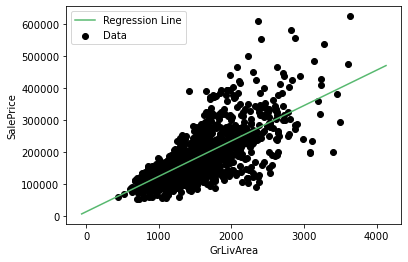

In [103]:
max_X = np.max(X) + 500
min_X = np.min(X) - 500

### Choose points evenly spaced between min_x in max_x
reg_x = np.linspace(min_X, max_X, 1000)

### Use the equation for our line to calculate y values
reg_y = weights[0][0] + weights[1][0] * reg_x

plt.plot(reg_x, reg_y, color='#58b970', label='Regression Line')
plt.scatter(X, Y, c='k', label='Data')

plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend()
plt.show()

#### Implementación con sklearn

Podemos comprobar como el resultado de nuestro código es exactamente igual al resultado de `sklearn`. Enhorabuena! Has programado tu propia **regresión lineal!!** 😃

In [104]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

### SKLearn requiere un array 2-dimensional X y 1 dimensional y.
### skl_X = (n,1); skl_Y = (n,)
skl_X = df_sub_cutoff[['GrLivArea']]
skl_Y = df_sub_cutoff['SalePrice']

lr.fit(skl_X,skl_Y)
print("Intercept:", lr.intercept_)
print("Coefficient:", lr.coef_)

Intercept: 13454.066705758654
Coefficient: [110.78992341]


## 4. Linear Regression - Gradient Descent

En este ejercicio resolveras el mismo problema anterior pero usando **Gradient Descent**

**Objetivos**:
- Asegurar los fundamentos matemáticos detrás del Gradient Descent.

**Problema**: Usando datos sobre el precio de la vivienda, intentaremos predecir el precio de una casa en base a la superficie habitable con un modelo de regresión.

**Datos:** [Kaggle's House Prices Dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

**Repaso:**

$$ RSS(w) = \sum_{n=1}^{N}[y_n-f(x_n)]^2 =  \sum_{n=1}^{N}[y_n- (w_0 + \sum_{d=1}^{D}w_dx_{nd}) ]^2 .$$

Loss function:

$$ RSS(w) = \frac{1}{2}\sum_{n=1}^{N}[y_n-f(x_n)]^2$$

Y lo que queremos es minimizar esta distancia, para que el modelo se acerque lo máximo posible a los valores verdaderos.

$$\nabla RSS(w) = X^T(Xw^t-y)$$

En resumen, el gradient descendiente para una regresión lineal, se basa en resolver esta ecuación de forma iterativa:

$$w^{t+1} = w^t - \eta * \nabla RSS(w)$$

#### Leer Datos

_En este ejercicio se completa la función que el ejecuta el descenso de gradiente. En la celda siguiente la lectura de datos se ejecuta sin novedad._

In [108]:
import pandas as pd
import numpy as np

# Leer datos
data = pd.read_csv('./data/train.csv')

# Extraer dichas columnas
newData = data[['GrLivArea','SalePrice']]
print(newData.head())

# Contruir x - y
x = newData['GrLivArea']
y = newData['SalePrice']

# Standarizar los datos
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x] 

print("Shape of X: ", x.shape)
print("Shape of y:", y.shape)

   GrLivArea  SalePrice
0       1710     208500
1       1262     181500
2       1786     223500
3       1717     140000
4       2198     250000
Shape of X:  (1460, 2)
Shape of y: (1460,)


#### Gradient Descent

_Completamos la función de descenso de gradiente, aplicando las fórmulas dadas al comienzo del ejercicio._

In [4]:
### TODO: Función para encontrar los valores w usando Gradient Descent
### Toma como argumentos: X, y, w, n_iterations, eta
### Completa la función añadiendo la loss función y la updating rule
### TU RESPUESTA ABAJO

def gradient_descent(x, y, w, iterations, eta):
    """Gradient descent
    
    Argumentos:
        x -- Matriz con los datos de entrenamiento
        y -- Vector con los datos de salida
        w -- Vector aleatoriamente inicializado
        iterations -- Número de iteraciones
        eta -- Learning Rate
        
    Ejemplo:
        import numpy as np

        # Learning rate
        eta = 0.01 

        # Número de iteraciones
        iterations = 2000 #No. of iterations

        # Seed para inicializar w
        np.random.seed(123)
        w0 = np.random.rand(2)
        
        training_y = np.array([208500, 181500, 223500, 
                                140000, 250000])
        training_x = np.array([[ 1.        ,  0.37020659],
                               [ 1.        , -0.48234664],
                               [ 1.        ,  0.51483616],
                               [ 1.        ,  0.38352774],
                               [ 1.        ,  1.29888065]])
                            
        weights, loss = gradient_descent(training_x, training_y, w0, iterations, eta)
        
        print(weights[-1])  #--> np.array([183845.82320222  40415.66453324])
    """
    
    past_loss = []
    past_w = [w]
    n = y.size
    for i in range(iterations):
        prediction = np.dot(x, w)
        error = prediction - y
        
        # TODO: Define Loss function
        #=============
        
        loss = 0.5 * np.sum(error ** 2)
        
        
        #=============
        past_loss.append(loss)
        
        GradRss = np.dot(x.T, error)
        
        # TODO: Define updating rule
        #=============
        
        w = w - eta * GradRss
        
        #=============
        past_w.append(w)
        
    return past_w, past_loss

Una vez construida nuestra función para el Gradient Descent podemos usarla para encontrar los valores optimos de $w$. **Prueba a modificar el learning rate para ver la convergencia del Gradient Descent.**

_Tomamos como base las matrices dadas, que de facto renombramos para mantener el código dado. Una vez aplidado el descenso de gradiente, el resultado es el correcto._

In [111]:
import numpy as np

# Learning rate
eta = 0.01 

# Número de iteraciones
iterations = 2000 #No. of iterations

# Seed para inicializar w
np.random.seed(123)
w0 = np.random.rand(2)

training_y = np.array([208500, 181500, 223500, 
                                140000, 250000])

training_x = np.array([[ 1.        ,  0.37020659],
                        [ 1.        , -0.48234664],
                        [ 1.        ,  0.51483616],
                        [ 1.        ,  0.38352774],
                        [ 1.        ,  1.29888065]])

x = training_x

y = training_y


weights, loss = gradient_descent(x, y, w0, iterations, eta)

print(weights[-1])

[183845.82320222  40415.66453324]


Hemos creado la siguiente función para ver como Gradient Descent encuentra el resultado final - **Tarda un poco**

_Lamentablemente, como ya se había advertido en clase, existe un error con el método animation de matplotlib._

In [112]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Definir figure
fig = plt.figure()
ax = plt.axes()
plt.title('Sale Price vs Living Area')
plt.xlabel('Living Area in square feet (normalised)')
plt.ylabel('Sale Price ($)')
plt.scatter(x[:,1], y, color='red')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
plt.close()

# Generar animacion de los datos
def init():
    line.set_data([], [])
    annotation.set_text('')
    return line, annotation

# Función para la animación
def animate(i):
    x = np.linspace(-5, 20, 1000)
    y = weights[i][1]*x + weights[i][0]
    line.set_data(x, y)
    annotation.set_text('loss = %.2f e10' % (loss[i]/10000000000))
    return line, annotation

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=300, interval=0, blit=True)

anim.save('animation.gif', writer='imagemagick', fps = 30)

# Visualizar la animación
import io
import base64
from IPython.display import HTML

filename = 'animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

MovieWriter imagemagick unavailable; trying to use pillow instead.


TypeError: 'str' object is not callable

_Hemos realizado el ejercicio opcional, que ha resultado de hecho bastante interesante. Lo hemos probado con cuatro páginas web, tres de las cuales tienen bastante que ver entre sí, mientras que la cuarta pretende ser muy diferente._

_Las tres similares son los artículos de wikipedia sobre la coliflor, el brócoli y las coles de bruselas, las cuales, aunque no lo parezca son biológicamente la misma especie. La cuatra página web es el artículo de wikipedia sobre el satélite de Júpiter Amaltea._

## (Opcional) - Calculando similitud entre páginas web

Este ejercicio pondrá a prueba tu capacidad para encontrar la similitud entre vectores usando cosine similarity.

**Objetivos**:
- Usar `Python` + `BeautifulSoup` para "scrapear" páginas webs.
- Asegurar los fundamentos matemáticos detrás del cosine similarity.

**Problema**: Dadas N páginas web, extraer el texto de ellas y determinar la similitud.

### Repaso

Como recordarás, podemos medir la similitud entre vectores usando la siguiente ecuación:<br>

<center>$\overrightarrow{u} \cdot \overrightarrow{v} = |\overrightarrow{u}||\overrightarrow{v}| \cos \theta $</center>

Que podemos reescribir de la siguiente forma:<br>

<center>$\cos \theta = \frac{\overrightarrow{u} \cdot \overrightarrow{v}}{|\overrightarrow{u}||\overrightarrow{v}|}$</center>

La **similitud** va a venir dada por el ángulo $\theta$, que nos indicará lo siguiente:

<img src="./Images/cosine_sim.png" width=70%/>

### Web scraping

La técnica llamada `web scraping` es la utilizada normalmente para extraer contenido de páginas webs y posteriormente procesarlos. Por ejemplo, si quisieramos construir una base de datos para entrenar un modelo con imágenes de ropa para hombres, podríamos intentar "scrapear" dicha sección de la página web del El Corte Inglés para conseguir las imágenes (no es tan fácil como suena).

In [4]:
# Estas librerias deben ser instaladas para hacer este ejercicio
!pip install beautifulsoup4
!pip install lxml

In [32]:
import re
import lxml
from bs4 import BeautifulSoup
import urllib
import urllib.request

url = "https://es.wikipedia.org/wiki/Canis_lupus_familiaris"

def parse_from_url(url):
    """
    Función para extraer el contenido (raw text) de una página web
    """
    
    html = urllib.request.urlopen(url).read()
    soup = BeautifulSoup(html, "html.parser" )
    for script in soup(["script", "style"]):
        script.extract()
        
    text = soup.get_text()
    
    # Eliminar saltos de linea
    text = re.sub('\s+', ' ', text)
    return text

parse_from_url(url)

' Canis familiaris - Wikipedia, la enciclopedia libre Canis familiaris De Wikipedia, la enciclopedia libre (Redirigido desde «Canis lupus familiaris») Ir a la navegación Ir a la búsqueda «Perro» redirige aquí. Para otras acepciones, véase Perro (desambiguación). Perro Estado de conservación DomesticadoTaxonomíaReino: AnimaliaFilo: ChordataSubfilo: VertebrataClase: MammaliaOrden: CarnivoraSuborden: CaniformiaFamilia: CanidaeSubfamilia: CaninaeTribu: CaniniSubtribu: CaninaGénero: CanisEspecie: C. familiarisLinnaeus, 1758Distribución Sinonimia Canis familiaris Linnaeus 1758 Canis familiaris domesticus Linnaeus 1758 [editar datos en Wikidata] El perro (Canis familiaris o Canis lupus familiaris dependiendo de si se lo considera una especie por derecho propio o una subespecie del lobo),[1]\u200b[2]\u200b[3]\u200b llamado perro doméstico o can,[4]\u200b y en algunos lugares coloquialmente llamado chucho,[5]\u200b tuso,[6]\u200b choco,[7]\u200b entre otros; es un mamífero carnívoro de la famil

_Extraemos el texto de forma análoga a la celda anterior._

In [57]:
### TODO: Escribe una función que reciba una lista de urls
### Aplica web scraping a cada una de ellas para extraer el contenido
### Y devuelva un diccionario con el contenido por cada url

### HINT: Usa la función anterior
### NOTE: Suele tardar un poco en extraer el contenido de las paginas web
### TU RESPUESTA ABAJO

def get_content(url_ls):
    """Extrae el contenido de una lista de urls
    
    Argumentos:
        url_ls -- Lista con urls
        
    Ejemplo:
        url_ls = ['https://es.wikipedia.org/wiki/Canis_lupus_familiaris', 
        'https://es.wikipedia.org/wiki/Canis_lupus',
        'https://es.wikipedia.org/wiki/Felis_silvestris_catus']
        
        url2content = get_content(url_ls)  
    
    Requerimientos:
        Esta función depende de 'parse_from_url()'
    """
    
    # TODO
    
    content = dict()
    
    for item in url_ls:
        text = parse_from_url(item)
        
        content[f'{item}'] = text
    
    return content

In [58]:
# Esta es la lista con las url; las tres primeras son las de las especies de Brassica, la cuarta la de Amaltea.

url_ls = ['https://es.wikipedia.org/wiki/Brassica_oleracea_var._botrytis', 
        'https://es.wikipedia.org/wiki/Brassica_oleracea_var._gemmifera',
        'https://es.wikipedia.org/wiki/Brassica_oleracea_var._italica',
         'https://es.wikipedia.org/wiki/Amaltea_(sat%C3%A9lite)'
         ]

In [59]:
content_url = get_content(url_ls)

len(content_url)

4

### Preprocesado

Como es lógico, no podemos resolver esta ecuación $\cos \theta = \frac{\overrightarrow{u} \cdot \overrightarrow{v}}{|\overrightarrow{u}||\overrightarrow{v}|}$ usando texto sin más, debemos convertir cada página web a un vector.

_En el prepocesado eliminamos los puntos de puntuación y pasamos todos las letras a minúsculas, antes de utilizar el método split de python._

In [60]:
### TODO: Escribe una función que reciba texto
### Y devuelva una lista con el texto separado por espacios
### Además del set de la lista
### "hola que que tal" - ["hola", "que", "que", "tal"], {"hola", "que", "tal"}
### TU RESPUESTA ABAJO

def tokenizer(text):
    """Divide el texto en palabras
    
    Argumentos:
        text -- String
        
    Ejemplo:
        url_ls = "Hola me llamo llamo Alex y estamos aprendiendo Algebra y estamos bien"
        
        tokens_txt, set_txt = tokenizer(url_ls)  
    
    Requerimientos:
        No uses ningún tokenizer ya implementado (nltk, spacy, ...)
    """
    
    # TODO
    
    punt = [',', '.', ';', ')', '(', ':', '"', "'"]
    
    
    for item in punt:
        text.replace(item, '')
    
    
    token_text = text.lower().split(' ')
    
    set_txt = set(token_text)
    
    
    return token_text, set_txt

In [61]:
# Probamos la función tokenizer, pero añadiendo puntos de puntuación, para comprobar que se eliminan.

text_ls = "Hola me llamo llamo Alex, y estamos aprendiendo Algebra; y estamos bien"

In [62]:
tokens_txt, set_txt = tokenizer(text_ls) 

In [63]:
tokens_txt


['hola',
 'me',
 'llamo',
 'llamo',
 'alex,',
 'y',
 'estamos',
 'aprendiendo',
 'algebra;',
 'y',
 'estamos',
 'bien']

In [64]:
set_txt

{'alex,',
 'algebra;',
 'aprendiendo',
 'bien',
 'estamos',
 'hola',
 'llamo',
 'me',
 'y'}

El siguiente paso es crear un conjunto con las palabras de ambas páginas web (unión), por ejemplo:

- Los perros son maravillosos...
- Los maravillosos años 80...

Por tanto, el conjunto para estas dos frases sería `{"los", "perros", "son", "maravillosos", "años", "80"}`. Debemos realizar esto para todas las combinaciones posibles, es decir:

- web_1
- web_2
- web_3

En este caso, las combinaciones serían (no importa el orden) `[web_1, web_2]`, `[web_1, web_3]`, `[web_2, web_3]`

_Utilizamos el método .combinations() de itertools. Quizás podría ser también interesante utilizar .product(), para incluir la combinación de cada url consigo misma, pero lo dejamos así._

In [65]:
### TODO: Escribe una función que recibe una lista de N páginas web
### Y calcula todas las combinaciones posibles entre ellas, no importa el orden
### [web_1, web_2, web_3, ...]
### Devuelve una lista de tuples con las combinaciones [(web_1, web_2), (web_1, web_3), ...]

# HINT: Puedes implementar esta función como quieras pero la librería itertools 
#       proporciona una función llamada `combinations` para realizar esta tarea.

### TU RESPUESTA ABAJO
import itertools
    
def combinations(url_ls):
    """Calcula todas las combinaciones posibles entre los elementos de una lista
    
    Argumentos:
        url_ls -- Lista de urls
        
    Ejemplo:
        url_ls = ['https://es.wikipedia.org/wiki/Canis_lupus_familiaris', 
        'https://es.wikipedia.org/wiki/Canis_lupus',
        'https://es.wikipedia.org/wiki/Felis_silvestris_catus']
        
        permutation = combinations(url_ls)  
    
    Requerimientos:
        Puedes implementar esta función como quieras pero la librería itertools 
        proporciona una función llamada `combinations` para realizar esta tarea.
    """
    # TODO
    
    combinaciones = itertools.combinations(url_ls, 2)
    
    return combinaciones

In [66]:

# probamos que funciona la función combinations. Nos devuelve un iterable...

url_ls = ['https://es.wikipedia.org/wiki/Brassica_oleracea_var._botrytis', 
        'https://es.wikipedia.org/wiki/Brassica_oleracea_var._gemmifera',
        'https://es.wikipedia.org/wiki/Brassica_oleracea_var._italica',
         'https://es.wikipedia.org/wiki/Amaltea_(sat%C3%A9lite)'
         ]

combi = combinations(url_ls)

In [67]:
combi

In [68]:
# ... que hay que iterar, ya que sin más solo nos muestra la dirección en memoria. Parece que funciona.

for item in combi:
    print(item)

('https://es.wikipedia.org/wiki/Brassica_oleracea_var._botrytis', 'https://es.wikipedia.org/wiki/Brassica_oleracea_var._gemmifera')
('https://es.wikipedia.org/wiki/Brassica_oleracea_var._botrytis', 'https://es.wikipedia.org/wiki/Brassica_oleracea_var._italica')
('https://es.wikipedia.org/wiki/Brassica_oleracea_var._botrytis', 'https://es.wikipedia.org/wiki/Amaltea_(sat%C3%A9lite)')
('https://es.wikipedia.org/wiki/Brassica_oleracea_var._gemmifera', 'https://es.wikipedia.org/wiki/Brassica_oleracea_var._italica')
('https://es.wikipedia.org/wiki/Brassica_oleracea_var._gemmifera', 'https://es.wikipedia.org/wiki/Amaltea_(sat%C3%A9lite)')
('https://es.wikipedia.org/wiki/Brassica_oleracea_var._italica', 'https://es.wikipedia.org/wiki/Amaltea_(sat%C3%A9lite)')


_Para hacer la union de los tuples iteramos dos veces, haciendo un append entre ellas._

In [69]:
### TODO: Escribe una función que recibe una lista con tuples
### [({'que', 'hola'}, {'que', 'es', 'guay'}), ({'que', 'hola'}, {'madrid', 'la', 'es'})]
### Y devuelve una lista con la union de los conjuntos
### [({'que', 'hola', 'es', 'guay'}), ({'que', 'hola', 'madrid', 'la', 'es'})]
### TU RESPUESTA ABAJO

def union(comb_ls):
    """Calcula la unión por cada tuple de una lista 
    
    Argumentos:
        comb_ls -- Lista de tuples
        
    Ejemplo:
        comb_ls = [({'que', 'hola'}, {'que', 'es', 'guay'}), ({'que', 'hola'}, {'madrid', 'la', 'es'})]
        
        union_ls = union(comb_ls)  # -> [{'es', 'que', 'hola', 'guay'}, {'es', 'que', 'hola', 'madrid', 'la'}]
    """
    
    # TODO
    
    union_ls = []
    
    
    # Iteramos en los elementos de la lista
    
    for item1 in comb_ls:
        
        set_ls = set()
        
        # Iteramos en los elementos del tuple, haciendo la unión
        
        for item2 in item1:
            
            set_ls = set_ls.union(item2)
            
        # Hacemos el append para cada iteración
        
        union_ls.append(set_ls)
    
    
    return union_ls

In [70]:
comb_ls = [({'que', 'hola'}, {'que', 'es', 'guay'}), ({'que', 'hola'}, {'madrid', 'la', 'es'})]

In [71]:
union_ls = union(comb_ls)

In [72]:
# Parece que funciona


union_ls

[{'es', 'guay', 'hola', 'que'}, {'es', 'hola', 'la', 'madrid', 'que'}]

Una vez que tenemos una lista de conjuntos por cada par de páginas web, podemos convertir el texto de la página web a un vector.

In [73]:
def set2vector(tokens_web1, tokens_web_2, set_web1, set_web2):
    """
    Función para convertir un conjunto a vector
    
    Argumentos:
        tokens_web1 -- Contenido tokenizado de página web 1
        tokens_web_2 -- Contenido tokenizado de página web 2
        set_web1 -- Conjunto de palabras de la página web 1
        set_web2 -- Conjunto de palabras de la página web 2
        
    Ejemplo:
        tokens_web1 = ["hola", "que", "tal", "soy", "Alex"]
        tokens_web_2 = ["hola", "me", "llamo"]
        set_web1 = {"hola", "que", "tal"}
        set_web2 = {"hola", "me", "llamo"}
        union_ls = set2vector(tokens_web1, tokens_web_2, set_web1, set_web2)  
        
    Requerimientos:
        Depende de la función `union()`
    """
    
    # Unimos los conjuntos
    join_set = union([(set_web1, set_web2)])[0]
    
    web1_array = []
    web2_array = [] 

    for word in join_set:
        if word in tokens_web1:
            web1_array.append(1)
        else:
            web1_array.append(0)
        if word in tokens_web_2:
            web2_array.append(1)
        else:
            web2_array.append(0)

    return web1_array, web2_array

tokens_web1 = ["hola", "que", "tal", "soy", "Alex"]
tokens_web_2 = ["hola", "me", "llamo"]
set_web1 = {"hola", "que", "tal", "soy", "Alex"}
set_web2 = {"hola", "me", "llamo"}
web1_array, web2_array = set2vector(tokens_web1, tokens_web_2, set_web1, set_web2)  

In [74]:
web1_array

[0, 1, 1, 1, 0, 1, 1]

In [75]:
web2_array

[1, 0, 0, 1, 1, 0, 0]

### Cosine Similarity

Por último, ya podemos implementar la ecuación: $\cos \theta = \frac{\overrightarrow{u} \cdot \overrightarrow{v}}{|\overrightarrow{u}||\overrightarrow{v}|}$

_Calculamos el coseno aplicando los métodos .dot() y .norm(), dividiendo a continuación._

In [76]:
### TODO: Escribe una función que recibe dos vectores, u y v
### Y devuelva la similaridad entre ambos vectores
###
### Paso 1: Si u y v son listas -> Convertirlo a arrays
###
### Paso 2: Calcula la similaridad entre ambos vectores
### TU RESPUESTA ABAJO

import numpy as np

def cosine_similarity(u, v):
    """Calcula la similaridad entre dos vectores
    
    Argumentos:
        u -- Vector 1
        v -- Vector 2
        
    Ejemplo:
        u = np.array([1, 2, 3])
        v = np.array([3, 2, 1])
        
        similarity = cosine_similarity(u, v)  # -> 0.71428
    """
    
    # TODO
    
    # Creamos otros dos numpy arrays a partir de los datos de entrada, con lo que nos aseguramos que ya no tenemos listas.
    
    uu = np.array(u)
    
    vv = np.array(v)
    
    # Calulamos el producto escalar, que dividimos entre el producto de las normas para hallar el coseno de similaridad.
    
    prodEsc = np.dot(uu, vv)
    
    prodNorm = np.linalg.norm(uu) * np.linalg.norm(vv)
    
    cos_sim = prodEsc / prodNorm
    
    return cos_sim

In [77]:
u = np.array([1, 2, 3])
v = np.array([3, 2, 1])

In [78]:
# Parece que funciona también.

similarity = cosine_similarity(u, v)

In [79]:
similarity

0.7142857142857143

_Finalmente determinamos las similaridades entre las cuatro páginas web. Se comprueba que hay un valor más alto entre las especies de Brassica, del orden de 0.35-0.40, que entre éstas y Amaltea, que se queda en el entorno de 0.20-0.25._

In [80]:
def websites_sim(url_ls):
    """Función para calcular la similaridad entre páginas web
    
    Argumentos:
        url_ls -- Listas de páginas web
        
    Ejemplo:
        url_ls = ['https://es.wikipedia.org/wiki/Canis_lupus_familiaris', 
        'https://es.wikipedia.org/wiki/Canis_lupus',
        'https://es.wikipedia.org/wiki/Felis_silvestris_catus']
        
        similarity_ls = websites_sim(url_ls)  
    """
    
    url2content = get_content(url_ls)
    
    # Creamos un diccionario donde cada url tendrá su contenido tokenizado y su conjunto
    url_dict = {}
    for url, content in url2content.items():
        toks, sets = tokenizer(content)
        url_dict[url] = {'tokens': toks,
                        'unique_tokens': sets}
    
    # Calculamos todas las combinaciones posibles de las direcciones de las páginas web
    comb_ls = combinations(url_ls)

    # Usando comb_ls y la función `set2vector()` convertimos cada página web a vectores
    print("Similaridad: ")
    for el in comb_ls:
        # Obtenemos los tokens y el conjunto para cada página web
        token_1 = url_dict[el[0]]['tokens']
        token_2 = url_dict[el[1]]['tokens']
        set_1 = url_dict[el[0]]['unique_tokens']
        set_2 = url_dict[el[1]]['unique_tokens']
        array_web1, array_web2 = set2vector(token_1, token_2, set_1, set_2)
        similarity = cosine_similarity(array_web1, array_web2)
        
        print("{} vs {} - {}".format(el[0], el[1], round(similarity, 3)))

                      
url_ls = ['https://es.wikipedia.org/wiki/Brassica_oleracea_var._botrytis', 
        'https://es.wikipedia.org/wiki/Brassica_oleracea_var._gemmifera',
        'https://es.wikipedia.org/wiki/Brassica_oleracea_var._italica',
         'https://es.wikipedia.org/wiki/Amaltea_(sat%C3%A9lite)'
         ]

similarity_ls = websites_sim(url_ls) 

Similaridad: 
https://es.wikipedia.org/wiki/Brassica_oleracea_var._botrytis vs https://es.wikipedia.org/wiki/Brassica_oleracea_var._gemmifera - 0.431
https://es.wikipedia.org/wiki/Brassica_oleracea_var._botrytis vs https://es.wikipedia.org/wiki/Brassica_oleracea_var._italica - 0.354
https://es.wikipedia.org/wiki/Brassica_oleracea_var._botrytis vs https://es.wikipedia.org/wiki/Amaltea_(sat%C3%A9lite) - 0.238
https://es.wikipedia.org/wiki/Brassica_oleracea_var._gemmifera vs https://es.wikipedia.org/wiki/Brassica_oleracea_var._italica - 0.355
https://es.wikipedia.org/wiki/Brassica_oleracea_var._gemmifera vs https://es.wikipedia.org/wiki/Amaltea_(sat%C3%A9lite) - 0.247
https://es.wikipedia.org/wiki/Brassica_oleracea_var._italica vs https://es.wikipedia.org/wiki/Amaltea_(sat%C3%A9lite) - 0.229
